In [38]:
import pandas as pd
from scipy.stats import chi2_contingency
import scipy.stats
from matplotlib import pyplot
import seaborn as sn

train_x = pd.read_csv('train_values.csv')
train_y = pd.read_csv('train_labels.csv')
test_x = pd.read_csv('test_values.csv')

In [2]:
train_y.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [3]:
test_x.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
1,z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
2,5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
3,mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
4,uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


In [4]:
train_x.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
list(train_x.columns)

['patient_id',
 'slope_of_peak_exercise_st_segment',
 'thal',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

In [6]:
train = pd.merge(train_x,train_y,how='inner',on='patient_id')
train.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [7]:
assert len(train) == len(train_x)
assert len(train) == len(train_y)

In [10]:
train.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [9]:
train.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [11]:
train.thal.value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [13]:
chest1 = pd.crosstab(train.chest_pain_type,train.heart_disease_present)
chest1
chi2_contingency(chest1)[1]

3.098871455233252e-10

In [14]:
thal1 = pd.crosstab(train.thal,train.heart_disease_present)
thal1
chi2_contingency(thal1)[1]

4.479443308737818e-12

In [15]:
ekg1 = pd.crosstab(train.resting_ekg_results,train.heart_disease_present)
ekg1
chi2_contingency(ekg1)[1]

0.0778124124163021

In [16]:
vess1 = pd.crosstab(train.num_major_vessels,train.heart_disease_present)
vess1
chi2_contingency(vess1)[1]

2.3403633523653863e-07

In [17]:
fast1 = pd.crosstab(train.fasting_blood_sugar_gt_120_mg_per_dl,train.heart_disease_present)
fast1
chi2_contingency(fast1)[1]

0.8739268588224036

In [18]:
exer1 = pd.crosstab(train.exercise_induced_angina,train.heart_disease_present)
exer1
chi2_contingency(exer1)[1]

4.684875545829872e-09

In [19]:
sex1 = pd.crosstab(train.sex,train.heart_disease_present)
sex1
chi2_contingency(sex1)[1]

1.4369438555127181e-05

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BBEF45EC8>,
      dtype=object)

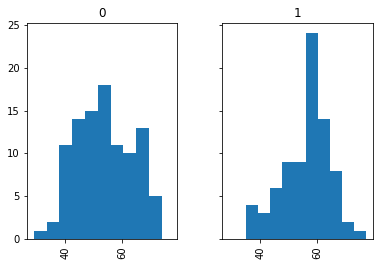

In [20]:
train.hist('age',by='heart_disease_present',sharex=True,sharey=True)

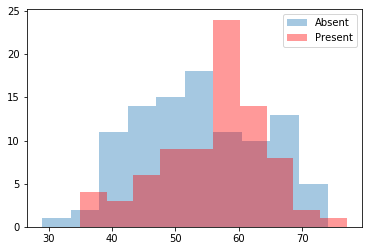

In [21]:
pyplot.hist(train[train['heart_disease_present']==0].age, alpha = 0.4, label='Absent')
pyplot.hist(train[train['heart_disease_present']==1].age, alpha = 0.4, label='Present',color = 'r')
pyplot.legend(loc = 'upper right')
pyplot.show()

In [22]:
import scipy.stats
#scipy.stats.anderson(train.age)
scipy.stats.levene(train[train['heart_disease_present']==0].age,train[train['heart_disease_present']==1].age)
#scipy.stats.shapiro(train.age)
scipy.stats.ttest_ind(train[train['heart_disease_present']==0].age,train[train['heart_disease_present']==1].age)

Ttest_indResult(statistic=-1.862433345614442, pvalue=0.0641900550030238)

In [23]:
train.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

In [26]:
train.slope_of_peak_exercise_st_segment.value_counts()

1    93
2    75
3    12
Name: slope_of_peak_exercise_st_segment, dtype: int64

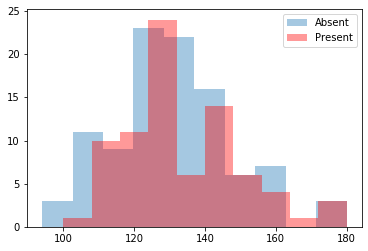

In [30]:
pyplot.hist(train[train['heart_disease_present']==0].resting_blood_pressure, alpha = 0.4, label='Absent')
pyplot.hist(train[train['heart_disease_present']==1].resting_blood_pressure, alpha = 0.4, label='Present',color = 'r')
pyplot.legend(loc = 'upper right')
pyplot.show()

In [36]:
#train['resting_blood_pressure'].describe()
#scipy.stats.anderson(train.resting_blo)
#scipy.stats.levene(train[train['heart_disease_present']==0].resting,train[train['heart_disease_present']==1].resting)
#scipy.stats.shapiro(train.resting_blood_pressure)
scipy.stats.mannwhitneyu(train[train['heart_disease_present']==0].resting_blood_pressure,train[train['heart_disease_present']==1].resting_blood_pressure)
#scipy.stats.mannwhitneyu()

MannwhitneyuResult(statistic=3667.5, pvalue=0.1687194571203714)

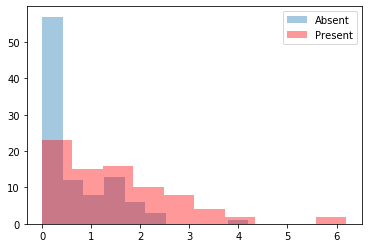

In [39]:
pyplot.hist(train[train['heart_disease_present']==0].oldpeak_eq_st_depression, alpha = 0.4, label='Absent')
pyplot.hist(train[train['heart_disease_present']==1].oldpeak_eq_st_depression, alpha = 0.4, label='Present',color = 'r')
pyplot.legend(loc = 'upper right')
pyplot.show()

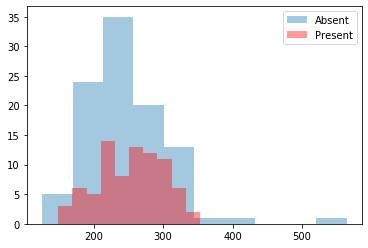

In [40]:
pyplot.hist(train[train['heart_disease_present']==0].serum_cholesterol_mg_per_dl, alpha = 0.4, label='Absent')
pyplot.hist(train[train['heart_disease_present']==1].serum_cholesterol_mg_per_dl, alpha = 0.4, label='Present',color = 'r')
pyplot.legend(loc = 'upper right')
pyplot.show()

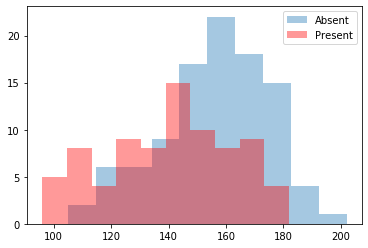

In [41]:
pyplot.hist(train[train['heart_disease_present']==0].max_heart_rate_achieved, alpha = 0.4, label='Absent')
pyplot.hist(train[train['heart_disease_present']==1].max_heart_rate_achieved, alpha = 0.4, label='Present',color = 'r')
pyplot.legend(loc = 'upper right')
pyplot.show()

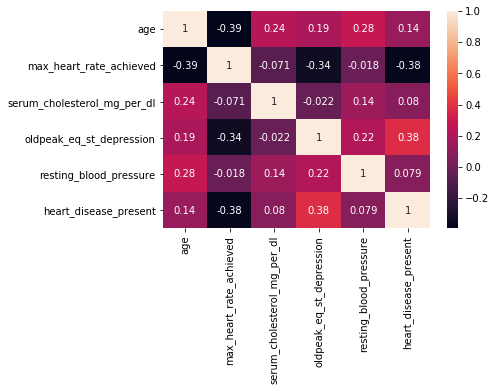

In [46]:
corrMatrix = train[['age','max_heart_rate_achieved','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','resting_blood_pressure','heart_disease_present']].corr()
sn.heatmap(corrMatrix, annot = True)
pyplot.show()

In [29]:
slope1 = pd.crosstab(train.slope_of_peak_exercise_st_segment,train.heart_disease_present)
slope1
chi2_contingency(slope1)[1]

5.8336308290248285e-06